In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import speckle_stuffs as spkstf
import pickle
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
rootff = ''
root_folder =  rootff+'/140760375914620/'
pickles = [root_folder+ff for ff in os.listdir(root_folder) if ff.split('.')[-1]=='pickle']
pickles.sort()

In [11]:
ccmethod = 'zncc'

df = pd.DataFrame(columns=['dataset','init','couplings'])

for picklesource in pickles:
    filehandler = open(picklesource, 'rb')
    [extr_traces, extr_footprints, dpars] = pickle.load(filehandler)
    filehandler.close()

    gt =  rootff+picklesource.split('/')[-1].split('_')[1] + os.sep+ '_'.join((picklesource.split('/')[-1]).split('_')[:3])+'_gt.mat'                     
    grtrh_traces = spkstf.extract_traces_from_mat(gt)
    couplings = np.array(spkstf.find_trace_couplings(grtrh_traces, extr_traces, method=ccmethod))
    # populate the dataframe
    for cc in couplings[:,2]:
        df = df.append({
            'dataset':':'.join(picklesource.split('_')[1:2]),
            'init':dpars['init'],
            'couplings':cc
        }, ignore_index=True)

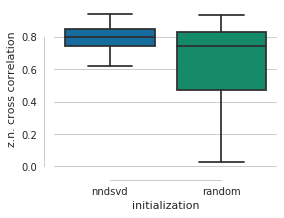

In [12]:
fig = plt.figure(figsize=(4,3))

sns.set(style="whitegrid", palette="colorblind")

tips = sns.load_dataset("tips")

sns.boxplot(x="init", y="couplings", data=df,
            showfliers=False, 
           )
sns.despine(offset=10, trim=True)

plt.xlabel('initialization')
plt.ylabel('z.n. cross correlation')
plt.show()